In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)

/tmp/ipykernel_13545/3857481183.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
random_state = 42

## Uso Simples

In [3]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)


clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)


print(clf.feature_importances_)

print(clf.predict([[0, 0, 0, 0]]))

[0.14205973 0.76664038 0.0282433  0.06305659]
[1]


# Database

In [4]:
# X = [[0, 0], [1, 1]]
# Y = [0, 1]
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

In [5]:
database_name = ''#'student-mat.csv'
coluna_target = ''#'school'
if database_name:
    base = pd.read_csv(database_name, sep=';')
    X = base.drop(columns=coluna_target)
    y = base[[coluna_target]]

# Dataprep

In [6]:
X_og = X.copy()

# Mantendo apenas Variáveis Independentes Desejadas

In [7]:
accepted_features = [
    # 'age',
    # 'Medu',
    # 'Fedu'
]

if accepted_features:
    X = X[accepted_features]

# Tratando Variáveis Categóricas

In [8]:
try:
    num_features = X_og.describe().columns.tolist()
except:
    pass

In [9]:
try:
    cat_features = X_og.drop(columns=num_features).columns.tolist()
except:
    pass

In [10]:
try:
    # One-hot encoding
    X = pd.get_dummies(X,
                       columns=cat_features,
                       drop_first=True)
except:
    pass

# Tratando Missings e Outliers

In [11]:
#

## Dividir Base de Treino

In [12]:
train_size = 0.8

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    train_size=train_size,
                                                                    random_state=random_state)

# Inicializar Classificador

In [14]:
clf_dict = {
    'max_depth': 7, # Profundidade Máxima da Árvore
    #'min_samples_split': 2,  # Mínimo para haver split de nó
    #'min_samples_leaf': 1,  # Mínimo para ser nó de decisão
    #'random_state': random_state,
    # 'n_neighbors': 3,
}

In [15]:
clf = RandomForestClassifier(**clf_dict)

# Train

In [16]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [17]:
print(clf.feature_importances_)

[0.0732514  0.86837907 0.0267891  0.03158043]


# Predict

In [18]:
# y_pred = clf.predict([[2., 2.]])
y_pred = clf.predict(X_test)

In [19]:
# y_pred_probs  = clf.predict_proba([[2., 2.]])
y_pred_probs  = clf.predict_proba(X_test)

# Teste

In [20]:
classes = None # ['class 0', 'class 1']

In [21]:
accuracy = accuracy_score(y_test, y_pred)

In [22]:
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.94


In [23]:
results = classification_report(y_test,
                                y_pred,
                                target_names=classes)

In [24]:
print(results)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        99
           1       0.93      0.96      0.95       101

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



# Teste de Validação Cruzada

In [25]:
metricas = {'acc': 'accuracy',
            'recall': 'recall_macro',
            'f1': 'f1_macro',
           }

In [26]:
# Validação de Cruzada de 5 dobras
k = 5  # Número de dobras
cv_scores = model_selection.cross_validate(clf,
                                            X,
                                            y,
                                            scoring=metricas,
                                            cv=k)

In [27]:
cv_scores

{'fit_time': array([0.2318306 , 0.22033668, 0.19485807, 0.19263482, 0.23166728]),
 'score_time': array([0.00949597, 0.00875378, 0.00793743, 0.00998783, 0.01162744]),
 'test_acc': array([0.95 , 0.975, 0.96 , 0.94 , 0.92 ]),
 'test_recall': array([0.94949495, 0.97474747, 0.959996  , 0.94019402, 0.92      ]),
 'test_f1': array([0.94981935, 0.97496934, 0.959996  , 0.939994  , 0.91960607])}

In [28]:
mean_test_acc = np.mean(cv_scores['test_acc'])
std_test_acc = np.std(cv_scores['test_acc'])

In [29]:
print(f"Média de cross-validation para acc: {mean_test_acc:.2f}")
print(f"Desvio-padrão de cross-validation para acc: {std_test_acc:.2f}")

Média de cross-validation para acc: 0.95
Desvio-padrão de cross-validation para acc: 0.02


# Matriz de Confusão

In [30]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Matriz de Confusão')
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.show()

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)

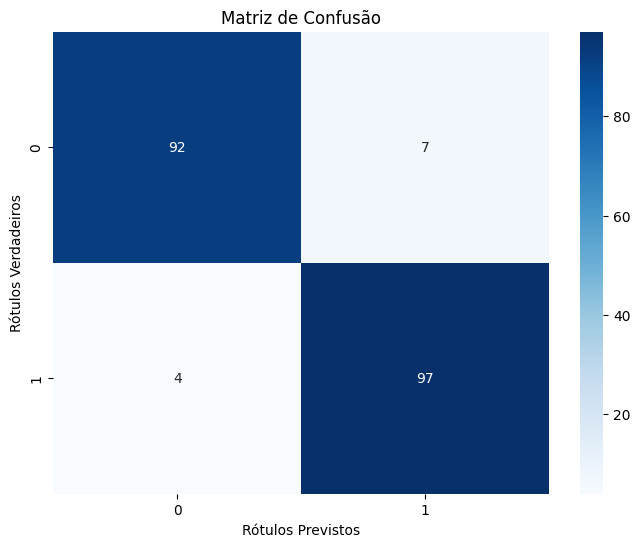

In [32]:
plot_confusion_matrix(conf_matrix, classes=set(y))


-----

Esse algoritmo:
- É capaz de lidar tanto com problemas de classificação quanto de regressão.
- É um ensemble de diversos classificadores/regressores.
- Introduz aleatoriedade tanto no subconjunto de dados quanto no subconjunto de features que cada classificador/regressor irá utilizar.
- É baseado em Árvores de Decisão, porém é mais robusto contra overfitting.
- Toda árvore na "floresta" vai votar no resultado, e a predição final é determinada pela maioria. 
- Usa bagging, ou seja, seleciona amostras aleatórias dos dados (com substituição) e treina modelos independentes.
- Além disso, utilizada de aleatoriedade de features. Em resumo, gera um subconjunto aleatório das features para as árvores. Dessa forma, busca garantir baixa correlação entre as árvores.